In [1]:
#importing all the necessori library
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
cars = pd.read_csv("car_price.csv")#creating a dataframe

In [3]:
cars.shape

(205, 26)

In [4]:
cars.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
#this pice of code is used to display all the rows and coulmns
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(cars.head(50))

    symboling normalized_losses make fuel_type aspiration num_of_doors  \
0           3                 ?  gas       std        two  convertible   
1           3                 ?  gas       std        two  convertible   
2           1                 ?  gas       std        two    hatchback   
3           2               164  gas       std       four        sedan   
4           2               164  gas       std       four        sedan   
5           2                 ?  gas       std        two        sedan   
6           1               158  gas       std       four        sedan   
7           1                 ?  gas       std       four        wagon   
8           1               158  gas     turbo       four        sedan   
9           0                 ?  gas     turbo        two    hatchback   
10          2               192  gas       std        two        sedan   
11          0               192  gas       std       four        sedan   
12          0               188  gas  

In [6]:
#to see which variable is categorical or which variable is  numerical in a dataset
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location      float64
wheel_base            object
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [7]:
#as we can analysize from above that some variables datatype is numeric but are saved as object.
#thats because of missing value so we will convert those variables back to numeric
col=["normalized_losses" ,"bore","stroke","horsepower","peak_rpm","price"]
for i in col:
    cars[i]=pd.to_numeric(cars[i], errors = 'coerce')
    print(cars[i].dtypes)# to check wether it is converted to numeric or not


float64
float64
float64
float64
float64
float64


In [8]:
cars.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location      float64
wheel_base            object
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [9]:
# we have stored the categorical feature in cat variable 
cat = cars.select_dtypes(include=["object"])
print(cat.shape)

(205, 10)


In [10]:
#have stored the numerical feature in num variable
num = cars.select_dtypes(include=["int64","float64"])
print(num.shape)

(205, 16)


In [11]:
cars.shape

(205, 26)

# data visualization on numeric variables and feature selection on the basis of multicollinearity


In [12]:
num.columns

Index(['symboling', 'normalized_losses', 'engine_location', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

#price visualization

In [13]:
cars["price"].isna().sum()

4

In [14]:
#its a dependent variable so we can not impute na values so it will be better to drop the rows which has na value in price variable
cars = cars.dropna(axis=0, subset=['price'])

In [15]:
cars.shape

(201, 26)

In [16]:
cars.isna().sum()

symboling             0
normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_of_doors          0
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

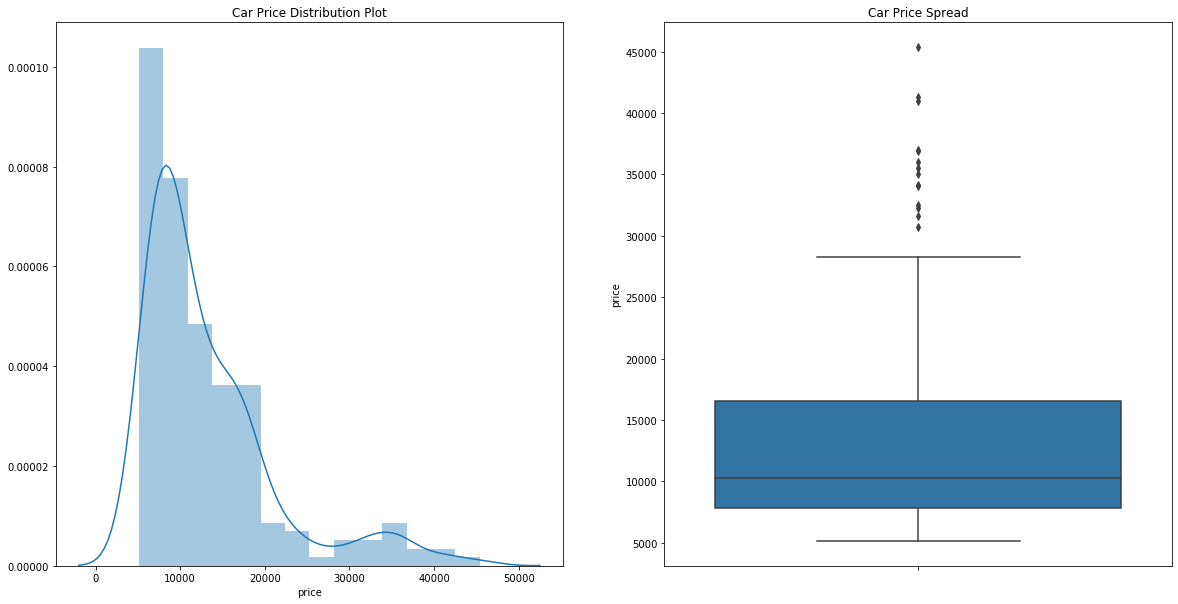

In [17]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [18]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
85%      18420.000000
90%      22470.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


In [19]:
#Inference the plot seemed to be right-skewed
#85%of data lies below 18400 and the data points  are far spread out  from the mean which indicates the high variance in price

In [20]:
num

,symboling,normalized_losses,engine_location,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [21]:
num.shape

(205, 16)

In [22]:
# as we can see symboling is not numerical type its categorical type
num.drop("symboling",axis=1,inplace=True)

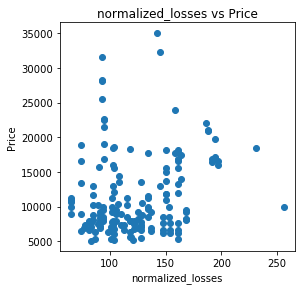

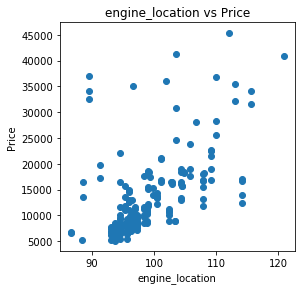

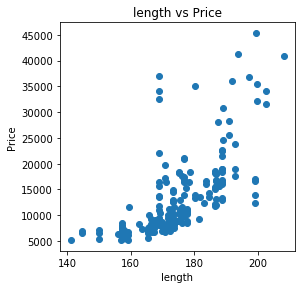

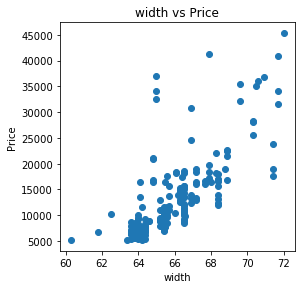

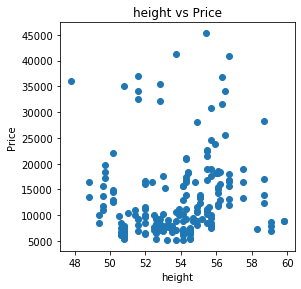

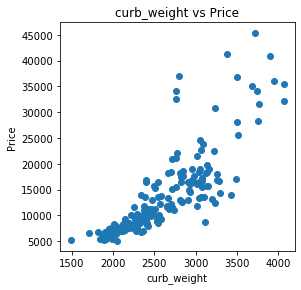

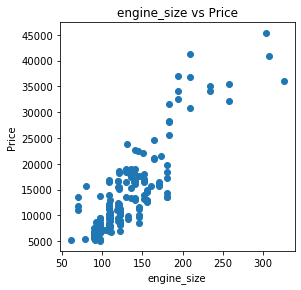

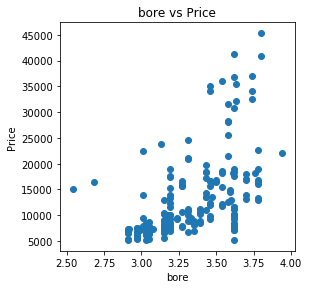

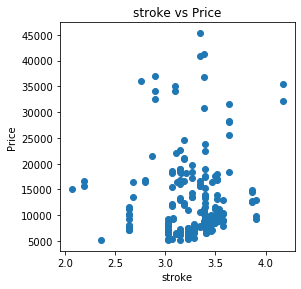

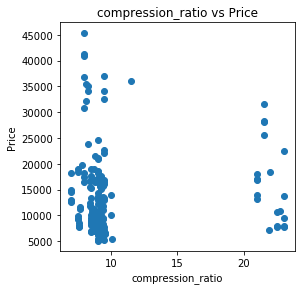

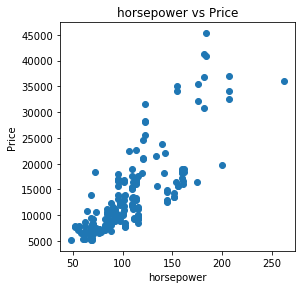

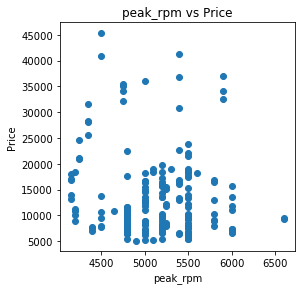

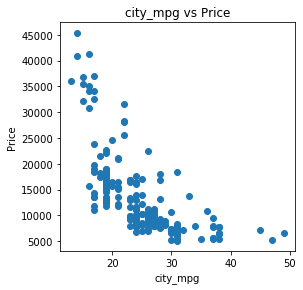

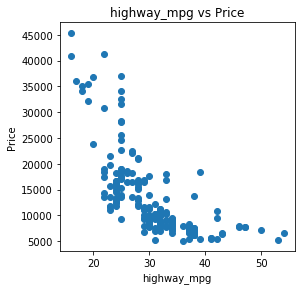

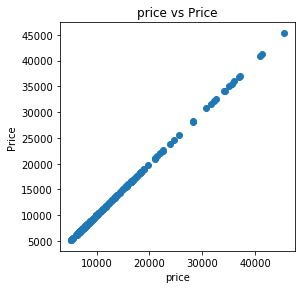

In [23]:
def scatter(x,fig):
    plt.subplot(20,20,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)


j=1
for i in num:
    plt.figure(figsize=(100,100))
    scatter(i, j)
    j=j+1
    plt.show()
    



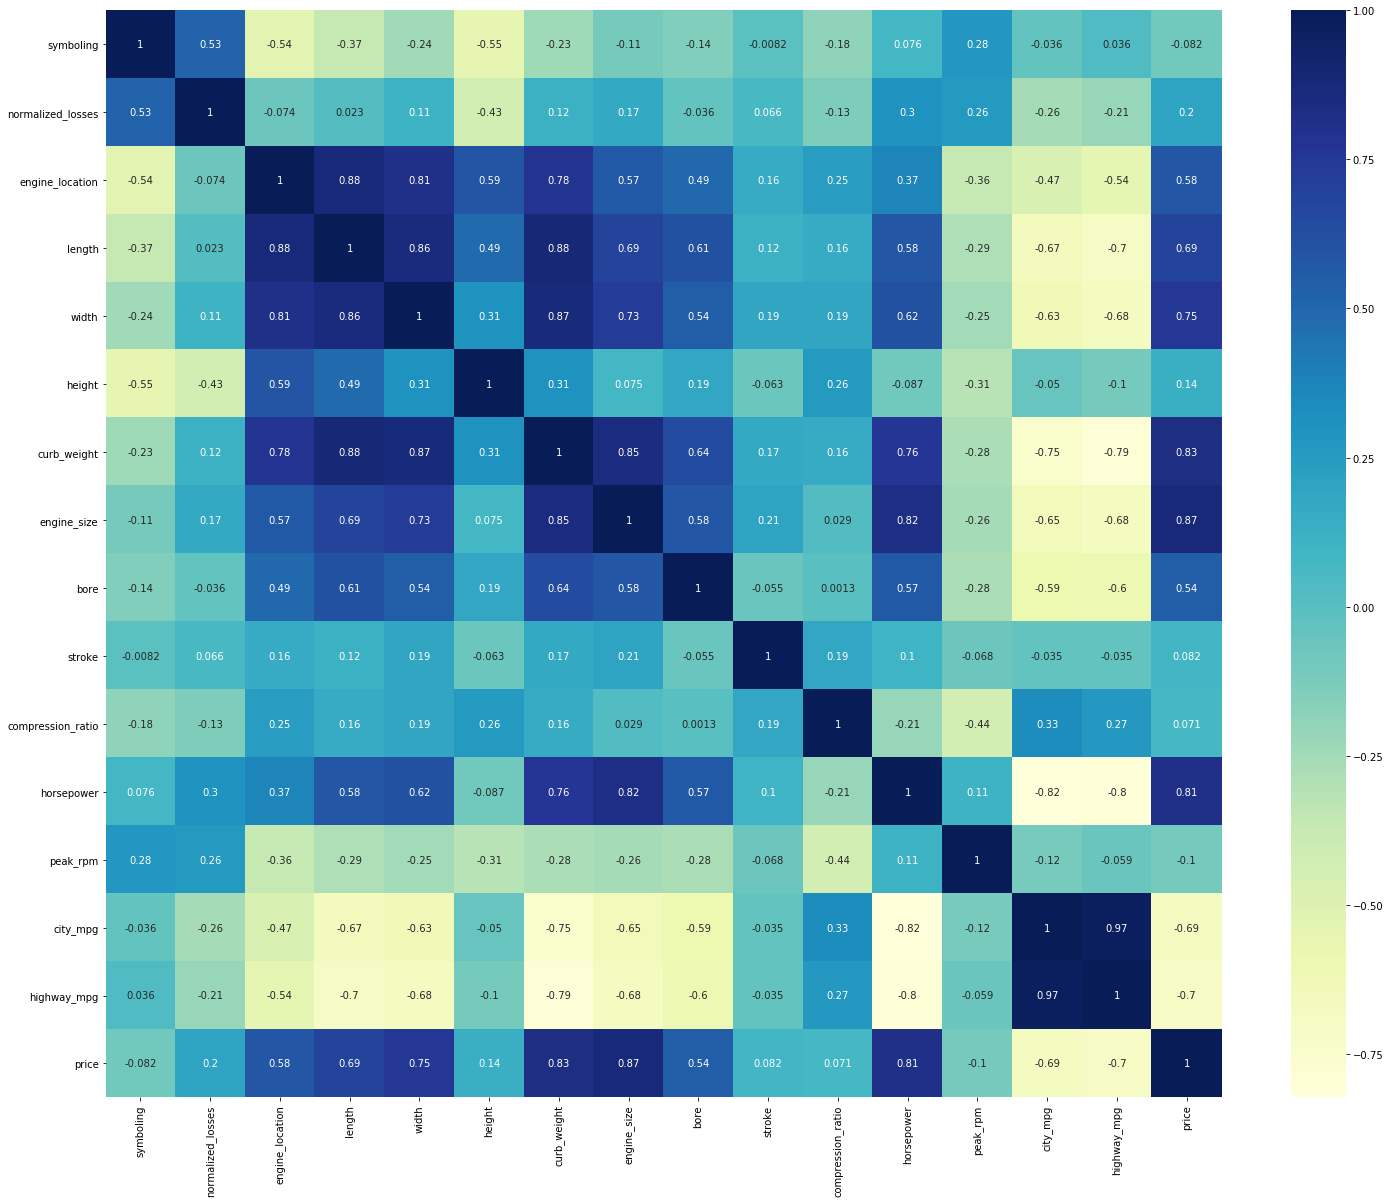

In [24]:
plt.figure(figsize = (25, 20))
sns.heatmap(cars.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [25]:
# as we can observe from the above visualization that some variables are not significant to the dependent variable price 
#so we will drop those variables

In [26]:
cars.drop(["normalized_losses","height","peak_rpm"],axis=1,inplace=True)

In [27]:
cars.shape

(201, 23)

In [28]:
cars.dtypes

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location      float64
wheel_base            object
length               float64
width                float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [29]:
cars.shape

(201, 23)

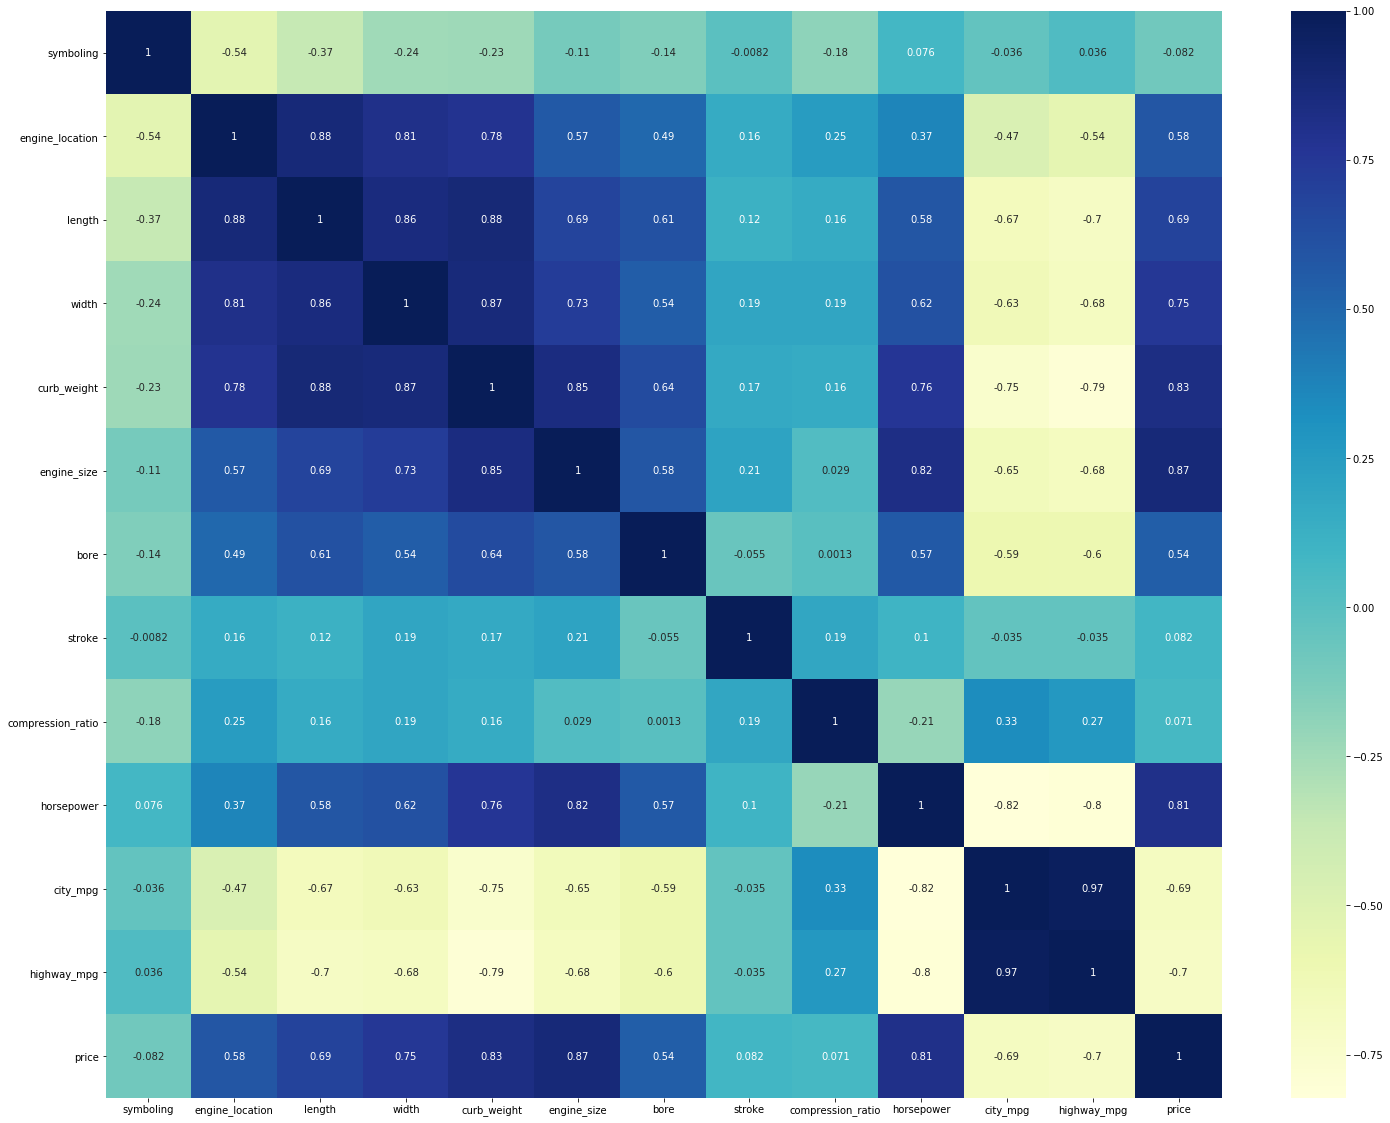

In [30]:
plt.figure(figsize = (25, 20))
sns.heatmap(cars.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [31]:
# as we have seen that city_mpg and highway_mpg has high multicollinearity so we will combine both of the variables
cars["mpg"]=cars["highway_mpg"]+cars["city_mpg"]

In [32]:
cars.head(10)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,city_mpg,highway_mpg,price,mpg
0,3,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,21,27,13495.0,48
1,3,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,21,27,16500.0,48
2,1,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,19,26,16500.0,45
3,2,gas,std,four,sedan,fwd,front,99.8,audi,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,24,30,13950.0,54
4,2,gas,std,four,sedan,4wd,front,99.4,audi,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,18,22,17450.0,40
5,2,gas,std,two,sedan,fwd,front,99.8,audi,177.3,...,136,mpfi,3.19,3.40,8.5,110.0,19,25,15250.0,44
6,1,gas,std,four,sedan,fwd,front,105.8,audi,192.7,...,136,mpfi,3.19,3.40,8.5,110.0,19,25,17710.0,44
7,1,gas,std,four,wagon,fwd,front,105.8,audi,192.7,...,136,mpfi,3.19,3.40,8.5,110.0,19,25,18920.0,44
8,1,gas,turbo,four,sedan,fwd,front,105.8,audi,192.7,...,131,mpfi,3.13,3.40,8.3,140.0,17,20,23875.0,37
10,2,gas,std,two,sedan,rwd,front,101.2,bmw,176.8,...,108,mpfi,3.50,2.80,8.8,101.0,23,29,16430.0,52


In [33]:
cars.drop(["city_mpg","highway_mpg"],axis=1,inplace=True)

In [34]:
cars.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,price,mpg
0,3,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,...,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,13495.0,48
1,3,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,...,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,16500.0,48
2,1,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,171.2,...,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,16500.0,45
3,2,gas,std,four,sedan,fwd,front,99.8,audi,176.6,...,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,13950.0,54
4,2,gas,std,four,sedan,4wd,front,99.4,audi,176.6,...,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,17450.0,40


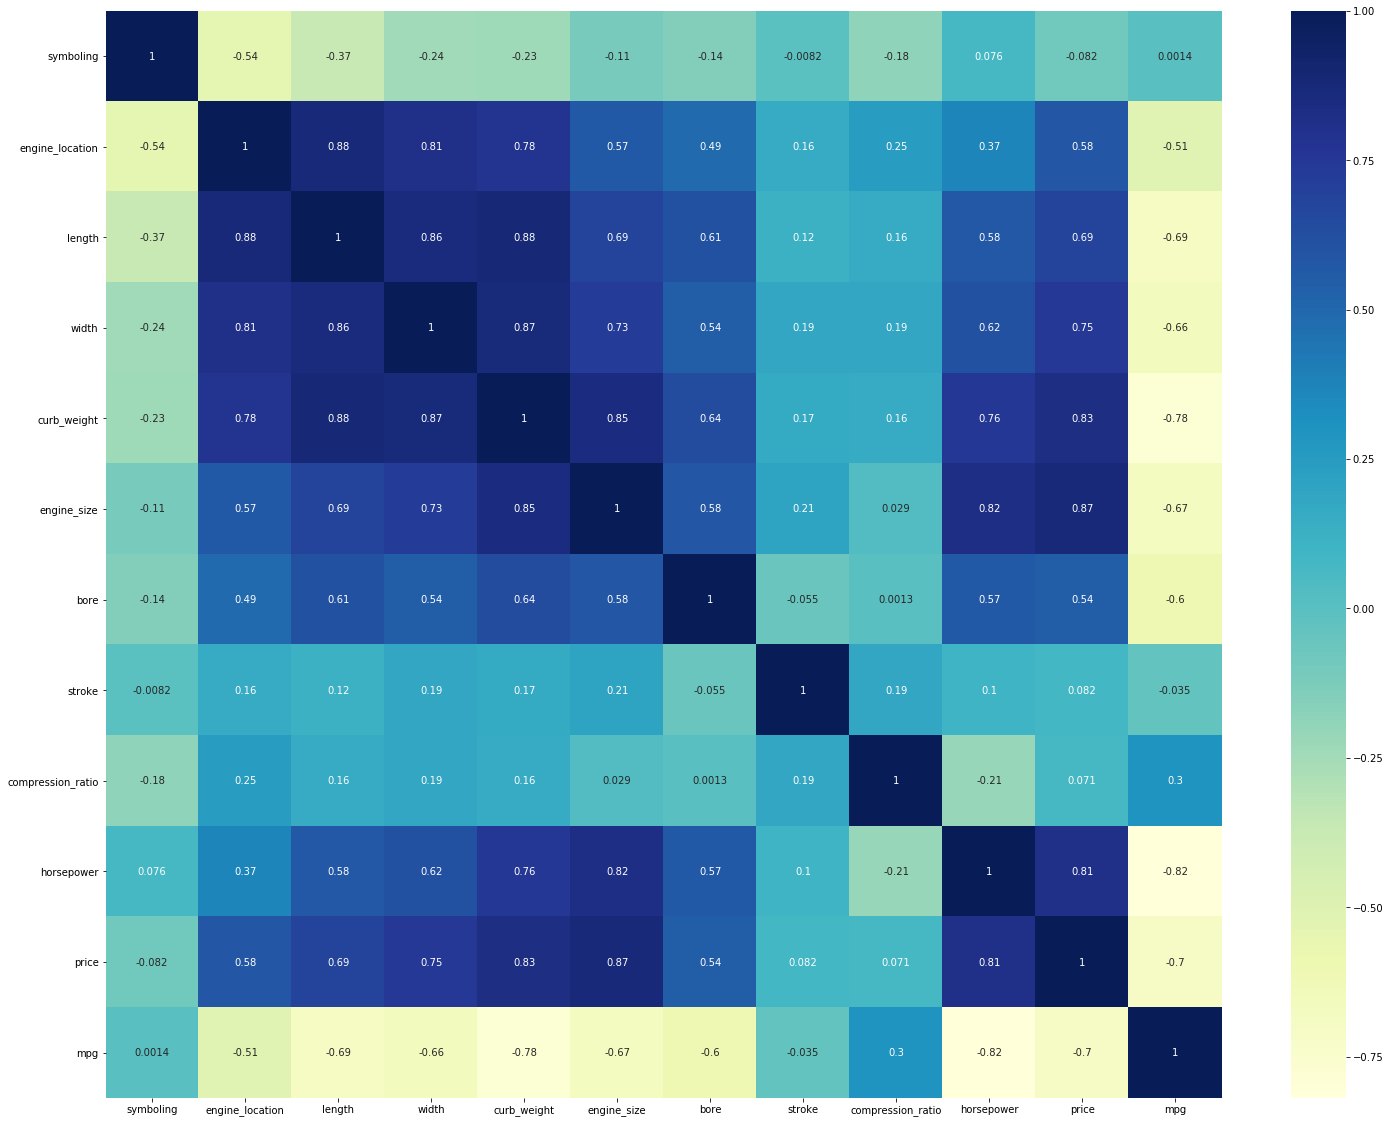

In [35]:
plt.figure(figsize = (25, 20))
sns.heatmap(cars.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [36]:
#have stored the numerical feature in num variable
num1 = cars.select_dtypes(include=["int64","float64"])
print(num1.shape)

(201, 12)


In [37]:
num1.drop("symboling",axis=1,inplace=True)

c:\users\tyagi\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


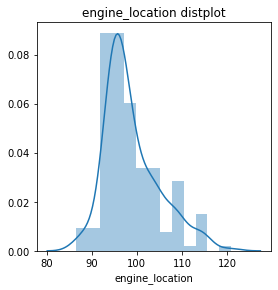

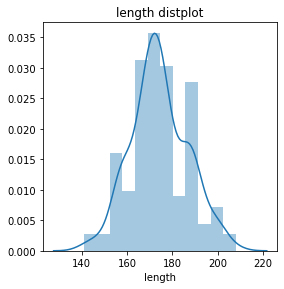

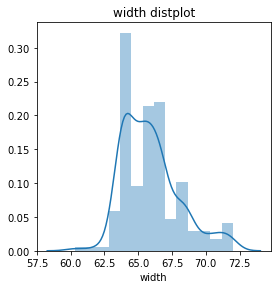

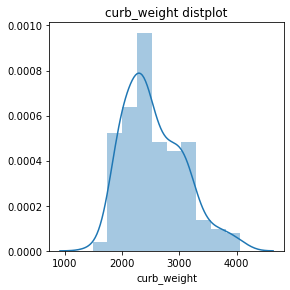

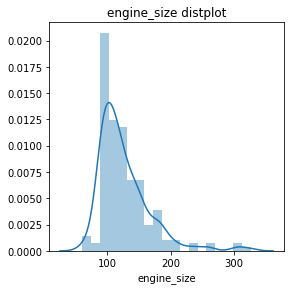

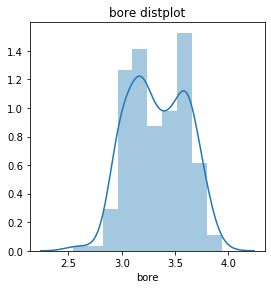

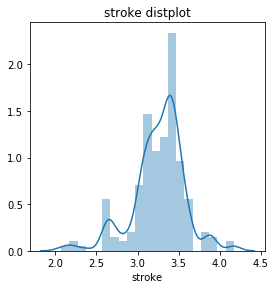

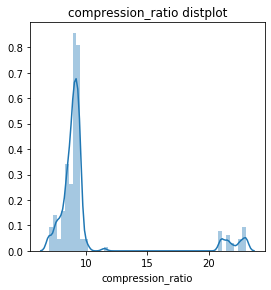

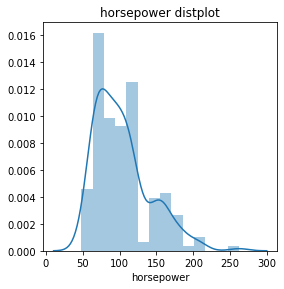

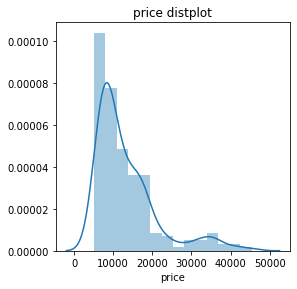

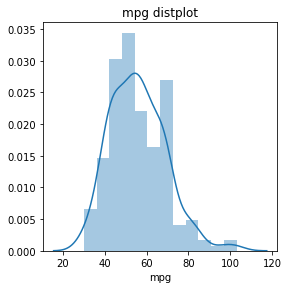

In [38]:
def dist(x,fig):
    plt.subplot(20,20,fig)
    sns.distplot(cars[x])
    plt.title(x+' distplot')
    
j=1
for i in num1:
    plt.figure(figsize=(100,100))
    dist(i, j)
    j=j+1
    plt.show()
    

In [39]:
num1.isna().sum()

engine_location      0
length               0
width                0
curb_weight          0
engine_size          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
price                0
mpg                  0
dtype: int64

In [40]:
for i in num1:
    cars[i]=cars[i].fillna(cars[i].median())

In [41]:
cars.isna().sum()

symboling            0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
price                0
mpg                  0
dtype: int64

# data visualization on categorical variables and creating lables


In [42]:
cat.head()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,wheel_base,engine_type,num_of_cylinders,fuel_system
0,gas,std,two,convertible,rwd,front,alfa-romero,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,alfa-romero,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,alfa-romero,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,audi,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,audi,ohc,five,mpfi


In [43]:
cat["symboling"]=cars["symboling"]

In [44]:
cat.head()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,wheel_base,engine_type,num_of_cylinders,fuel_system,symboling
0,gas,std,two,convertible,rwd,front,alfa-romero,dohc,four,mpfi,3.0
1,gas,std,two,convertible,rwd,front,alfa-romero,dohc,four,mpfi,3.0
2,gas,std,two,hatchback,rwd,front,alfa-romero,ohcv,six,mpfi,1.0
3,gas,std,four,sedan,fwd,front,audi,ohc,four,mpfi,2.0
4,gas,std,four,sedan,4wd,front,audi,ohc,five,mpfi,2.0


In [45]:
# to check unique value in categorical variables
for col in cat:
    freq=cars[col].value_counts()
    print(freq)
    print("----------------------------------------------------------")

gas       181
diesel     20
Name: make, dtype: int64
----------------------------------------------------------
std      165
turbo     36
Name: fuel_type, dtype: int64
----------------------------------------------------------
four    113
two      86
?         2
Name: aspiration, dtype: int64
----------------------------------------------------------
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: num_of_doors, dtype: int64
----------------------------------------------------------
fwd    118
rwd     75
4wd      8
Name: body_style, dtype: int64
----------------------------------------------------------
front    198
rear       3
Name: drive_wheels, dtype: int64
----------------------------------------------------------
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
merc

In [46]:
cat.drop("symboling",axis=1,inplace=True)

In [47]:
# to impute ? or which we can say is a missing value here with a mode of that variable
for j in cat:
    cars[j] = np.where(cars[j].str[0]=='?',cars[j].mode(),cars[j])

In [48]:
for col in cat:
    freq=cars[col].value_counts()
    print(freq)
    print("----------------------------------------------------------")

gas       181
diesel     20
Name: make, dtype: int64
----------------------------------------------------------
std      165
turbo     36
Name: fuel_type, dtype: int64
----------------------------------------------------------
four    115
two      86
Name: aspiration, dtype: int64
----------------------------------------------------------
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: num_of_doors, dtype: int64
----------------------------------------------------------
fwd    118
rwd     75
4wd      8
Name: body_style, dtype: int64
----------------------------------------------------------
front    198
rear       3
Name: drive_wheels, dtype: int64
----------------------------------------------------------
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz   

In [49]:
cat["symboling"]=cars["symboling"]

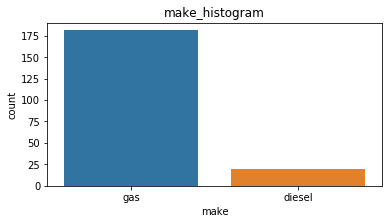

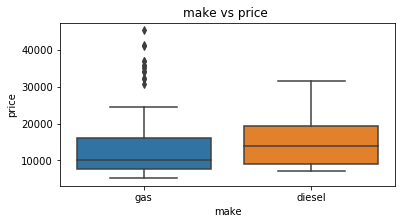

***************************************************************************************************************


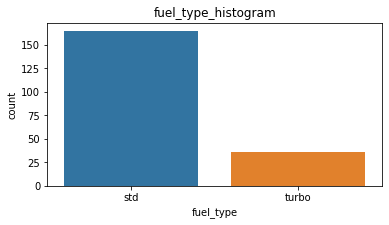

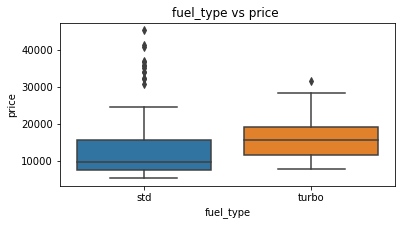

***************************************************************************************************************


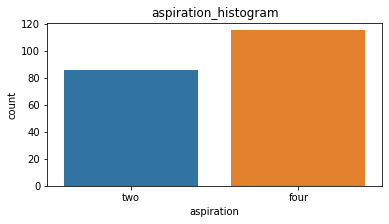

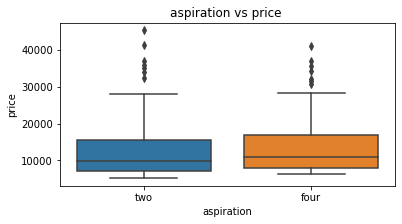

***************************************************************************************************************


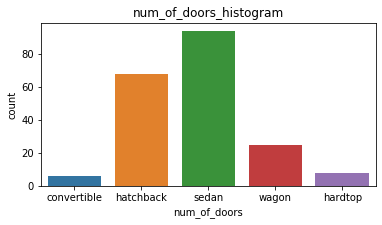

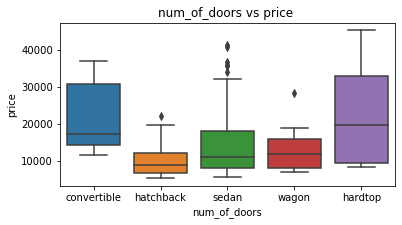

***************************************************************************************************************


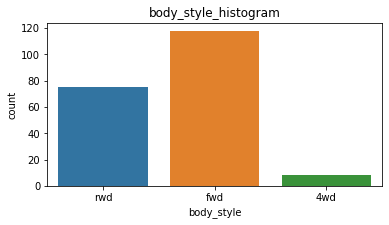

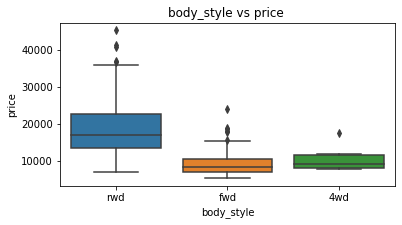

***************************************************************************************************************


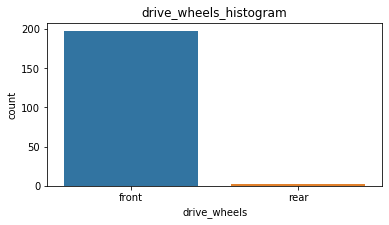

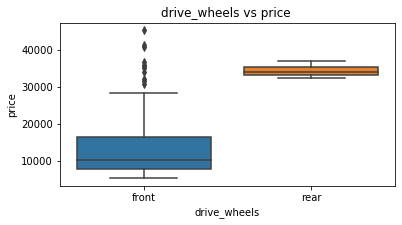

***************************************************************************************************************


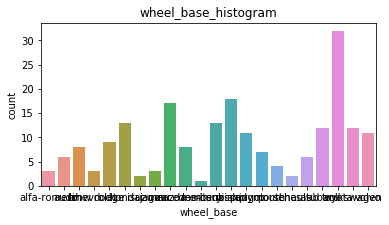

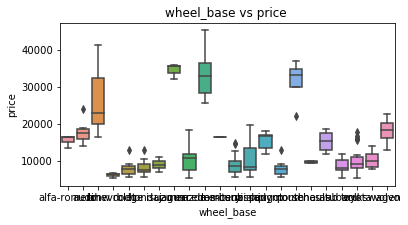

***************************************************************************************************************


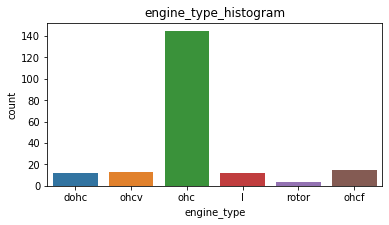

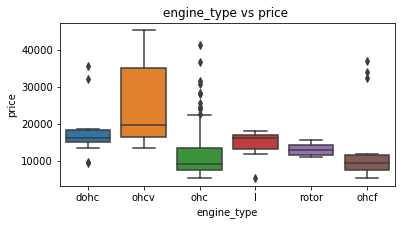

***************************************************************************************************************


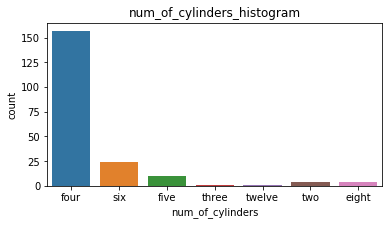

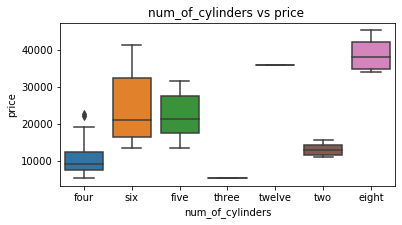

***************************************************************************************************************


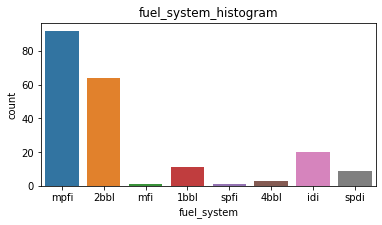

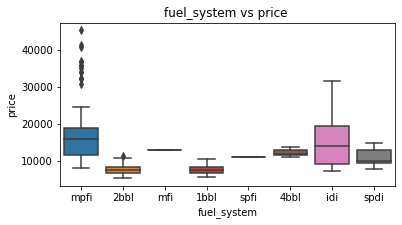

***************************************************************************************************************


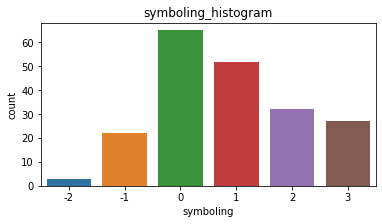

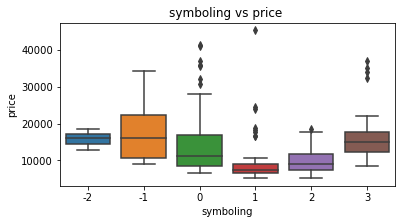

***************************************************************************************************************


In [50]:
for c in cat:
    plt.figure(figsize=(6,3))
    
    sns.countplot(data = cars, x = c)
    plt.title(c+"_histogram")
    
    plt.show()
    
    plt.figure(figsize=(6,3))
    sns.boxplot(x=cars[c],y=cars["price"])
    plt.title(c+" vs price ")
    plt.show()
    print("***************************************************************************************************************")

##creating dummies


In [51]:
cat.head(20)

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,wheel_base,engine_type,num_of_cylinders,fuel_system,symboling
0,gas,std,two,convertible,rwd,front,alfa-romero,dohc,four,mpfi,3.0
1,gas,std,two,convertible,rwd,front,alfa-romero,dohc,four,mpfi,3.0
2,gas,std,two,hatchback,rwd,front,alfa-romero,ohcv,six,mpfi,1.0
3,gas,std,four,sedan,fwd,front,audi,ohc,four,mpfi,2.0
4,gas,std,four,sedan,4wd,front,audi,ohc,five,mpfi,2.0
5,gas,std,two,sedan,fwd,front,audi,ohc,five,mpfi,2.0
6,gas,std,four,sedan,fwd,front,audi,ohc,five,mpfi,1.0
7,gas,std,four,wagon,fwd,front,audi,ohc,five,mpfi,1.0
8,gas,turbo,four,sedan,fwd,front,audi,ohc,five,mpfi,1.0
9,gas,turbo,two,hatchback,4wd,front,audi,ohc,five,mpfi,NaN


In [52]:
cars.loc[cars.num_of_cylinders=='two','num_of_cylinders']=2
cars.loc[cars.num_of_cylinders=='four','num_of_cylinders']=4
cars.loc[cars.num_of_cylinders=='five','num_of_cylinders']=5
cars.loc[cars.num_of_cylinders=='six','num_of_cylinders']=6
cars.loc[cars.num_of_cylinders=='eight','num_of_cylinders']=8
cars.loc[cars.num_of_cylinders=='twelve','num_of_cylinders']=12
cars.loc[cars.num_of_cylinders=='three','num_of_cylinders']=3

In [53]:
cars.loc[cars.aspiration=='two','aspiration']=2
cars.loc[cars.aspiration=='four','aspiration']=4

In [54]:
#on the basis of singularity we are droping these two variables
cars.drop(["drive_wheels","make"],axis=1,inplace=True)

In [55]:
cat.drop("symboling",axis=1,inplace=True)

In [56]:
cat.drop(["num_of_cylinders","aspiration"],axis=1,inplace=True)

In [57]:
cat.head()

,make,fuel_type,num_of_doors,body_style,drive_wheels,wheel_base,engine_type,fuel_system
0,gas,std,convertible,rwd,front,alfa-romero,dohc,mpfi
1,gas,std,convertible,rwd,front,alfa-romero,dohc,mpfi
2,gas,std,hatchback,rwd,front,alfa-romero,ohcv,mpfi
3,gas,std,sedan,fwd,front,audi,ohc,mpfi
4,gas,std,sedan,4wd,front,audi,ohc,mpfi


In [58]:
cat.drop(["drive_wheels","make"],axis=1,inplace=True)

In [59]:
 from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [60]:
for h in  cat:
    cars[h] = le.fit_transform(cars[h])

In [61]:
cars.head(20)

,symboling,fuel_type,aspiration,num_of_doors,body_style,engine_location,wheel_base,length,width,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,price,mpg
0,3,0,2,0,2,88.6,0,168.8,64.1,2548,0,4,130,5,3.47,2.68,9.0,111.0,13495.0,48
1,3,0,2,0,2,88.6,0,168.8,64.1,2548,0,4,130,5,3.47,2.68,9.0,111.0,16500.0,48
2,1,0,2,2,2,94.5,0,171.2,65.5,2823,4,6,152,5,2.68,3.47,9.0,154.0,16500.0,45
3,2,0,4,3,1,99.8,1,176.6,66.2,2337,2,4,109,5,3.19,3.40,10.0,102.0,13950.0,54
4,2,0,4,3,0,99.4,1,176.6,66.4,2824,2,5,136,5,3.19,3.40,8.0,115.0,17450.0,40
5,2,0,2,3,1,99.8,1,177.3,66.3,2507,2,5,136,5,3.19,3.40,8.5,110.0,15250.0,44
6,1,0,4,3,1,105.8,1,192.7,71.4,2844,2,5,136,5,3.19,3.40,8.5,110.0,17710.0,44
7,1,0,4,4,1,105.8,1,192.7,71.4,2954,2,5,136,5,3.19,3.40,8.5,110.0,18920.0,44
8,1,1,4,3,1,105.8,1,192.7,71.4,3086,2,5,131,5,3.13,3.40,8.3,140.0,23875.0,37
10,2,0,2,3,2,101.2,2,176.8,64.8,2395,2,4,108,5,3.50,2.80,8.8,101.0,16430.0,52


In [62]:
cars.isna().sum()

symboling            0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
engine_location      0
wheel_base           0
length               0
width                0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
price                0
mpg                  0
dtype: int64

# creating model on numeric variables only to detect multicollinearity

In [63]:
cars_num=cars[["engine_location","length","width","curb_weight","engine_size","bore","stroke","compression_ratio","horsepower","price","mpg"]]

In [64]:
cars.head(20)

,symboling,fuel_type,aspiration,num_of_doors,body_style,engine_location,wheel_base,length,width,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,price,mpg
0,3,0,2,0,2,88.6,0,168.8,64.1,2548,0,4,130,5,3.47,2.68,9.0,111.0,13495.0,48
1,3,0,2,0,2,88.6,0,168.8,64.1,2548,0,4,130,5,3.47,2.68,9.0,111.0,16500.0,48
2,1,0,2,2,2,94.5,0,171.2,65.5,2823,4,6,152,5,2.68,3.47,9.0,154.0,16500.0,45
3,2,0,4,3,1,99.8,1,176.6,66.2,2337,2,4,109,5,3.19,3.40,10.0,102.0,13950.0,54
4,2,0,4,3,0,99.4,1,176.6,66.4,2824,2,5,136,5,3.19,3.40,8.0,115.0,17450.0,40
5,2,0,2,3,1,99.8,1,177.3,66.3,2507,2,5,136,5,3.19,3.40,8.5,110.0,15250.0,44
6,1,0,4,3,1,105.8,1,192.7,71.4,2844,2,5,136,5,3.19,3.40,8.5,110.0,17710.0,44
7,1,0,4,4,1,105.8,1,192.7,71.4,2954,2,5,136,5,3.19,3.40,8.5,110.0,18920.0,44
8,1,1,4,3,1,105.8,1,192.7,71.4,3086,2,5,131,5,3.13,3.40,8.3,140.0,23875.0,37
10,2,0,2,3,2,101.2,2,176.8,64.8,2395,2,4,108,5,3.50,2.80,8.8,101.0,16430.0,52


In [65]:
cars_num.head()

,engine_location,length,width,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,price,mpg
0,88.6,168.8,64.1,2548,130,3.47,2.68,9.0,111.0,13495.0,48
1,88.6,168.8,64.1,2548,130,3.47,2.68,9.0,111.0,16500.0,48
2,94.5,171.2,65.5,2823,152,2.68,3.47,9.0,154.0,16500.0,45
3,99.8,176.6,66.2,2337,109,3.19,3.40,10.0,102.0,13950.0,54
4,99.4,176.6,66.4,2824,136,3.19,3.40,8.0,115.0,17450.0,40


In [66]:
y=cars_num["price"]
x=cars_num.drop("price",axis=1)


In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(  x, y, test_size=0.2, random_state=101)


In [68]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 10)
(41, 10)
(160,)
(41,)


##model bulding

In [69]:
import statsmodels.api as sm #ols

m1= sm.OLS(y_train, x_train).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              322.4
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                    4.94e-96
Time:                        21:45:21   Log-Likelihood:                         -1527.3
No. Observations:                 160   AIC:                                      3075.
Df Residuals:                     150   BIC:                                      3105.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
engine_location     146.8304    108.804      1.350      0.179     -68.155     361.816
length              -52.2116     67.514     -0.773      0.441    -185.613      81.190
width                97.5134    178.807      0.545      0.586    -255.793     450.819
curb_weight           0.7561      1.943      0.389      0.698      -3.084       4.596
engine_size         105.5957     15.134      6.977      0.000      75.692     135.499
bore              -2350.3155   1406.551     -1.671      0.097   -5129.528     428.897
stroke            -3486.6049    955.729     -3.648      0.000   -5375.035   -1598.175
compression_ratio   271.2387     95.678      2.835      0.005      82.189     460.289
horsepower           62.9229     18.221      3.453      0.001      26.920      98.925
mpg                 -71.2864     46.934     -1.519      0.131    -164.023      21.450
==============================================================================
Omnibus:                       18.244   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.416
Skew:                           0.194   Prob(JB):                     2.29e-15
Kurtosis:                       6.156   Cond. No.                     1.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:

import statsmodels.api as sm #ols

m1= sm.OLS(y.astype(float), x.astype(float)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              410.9
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                   2.22e-123
Time:                        21:45:21   Log-Likelihood:                         -1910.3
No. Observations:                 201   AIC:                                      3841.
Df Residuals:                     191   BIC:                                      3874.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
engine_location     142.1555     97.126      1.464      0.145     -49.421     333.732
length              -66.1895     55.166     -1.200      0.232    -175.002      42.624
width               148.6879    153.358      0.970      0.333    -153.804     451.180
curb_weight           1.2800      1.740      0.736      0.463      -2.152       4.712
engine_size          96.9815     13.500      7.184      0.000      70.353     123.610
bore              -2650.3637   1167.188     -2.271      0.024   -4952.597    -348.131
stroke            -3105.3822    787.686     -3.942      0.000   -4659.063   -1551.701
compression_ratio   307.2229     83.018      3.701      0.000     143.472     470.974
horsepower           61.8373     16.069      3.848      0.000      30.143      93.532
mpg                 -93.8142     41.255     -2.274      0.024    -175.189     -12.440
==============================================================================
Omnibus:                       22.910   Durbin-Watson:                   0.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.375
Skew:                           0.296   Prob(JB):                     7.86e-19
Kurtosis:                       6.099   Cond. No.                     1.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# as we can p-value is very high so we will check vif score each independent variable

In [71]:
cars_num.head()

,engine_location,length,width,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,price,mpg
0,88.6,168.8,64.1,2548,130,3.47,2.68,9.0,111.0,13495.0,48
1,88.6,168.8,64.1,2548,130,3.47,2.68,9.0,111.0,16500.0,48
2,94.5,171.2,65.5,2823,152,2.68,3.47,9.0,154.0,16500.0,45
3,99.8,176.6,66.2,2337,109,3.19,3.40,10.0,102.0,13950.0,54
4,99.4,176.6,66.4,2824,136,3.19,3.40,8.0,115.0,17450.0,40


In [72]:
cars_num.drop("price",axis=1,inplace=True)

c:\users\tyagi\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [73]:
names=list(cars_num.columns)

In [74]:
names

['engine_location',
 'length',
 'width',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'mpg']

In [75]:
# calculating vif score for indipendent variable of cars_num variable
for p in range(0,len(names)):
    y=cars_num.loc[ :,cars_num.columns== names[p]]
    x=cars_num.loc[ :,cars_num.columns!= names[p]]
    model= sm.OLS(y,x)
    results=model.fit()
    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print(
         "R squared value of {} column is {} keeping all other columns as features".format(names[p],(round(rsq,2)))
    )
    print(
        "variation inflation factor of {} is {} \n".format(names[p],vif)
    )

R squared value of engine_location column is 1.0 keeping all other columns as features
variation inflation factor of engine_location is 1675.04 

R squared value of length column is 1.0 keeping all other columns as features
variation inflation factor of length is 1682.08 

R squared value of width column is 1.0 keeping all other columns as features
variation inflation factor of width is 1852.33 

R squared value of curb_weight column is 1.0 keeping all other columns as features
variation inflation factor of curb_weight is 372.93 

R squared value of engine_size column is 0.98 keeping all other columns as features
variation inflation factor of engine_size is 58.84 

R squared value of bore column is 1.0 keeping all other columns as features
variation inflation factor of bore is 275.6 

R squared value of stroke column is 0.99 keeping all other columns as features
variation inflation factor of stroke is 120.44 

R squared value of compression_ratio column is 0.93 keeping all other column

In [76]:
# using standard scaler to reduce structural Multicollinearity
from sklearn.preprocessing import StandardScaler

In [77]:
scale= StandardScaler()

In [78]:
cars_num=scale.fit_transform(cars_num)

In [79]:
cars_num


array([[-1.6851071 , -0.43940949, -0.85346024, ..., -0.29143464,
         0.20617449, -0.59984404],
       [-1.6851071 , -0.43940949, -0.85346024, ..., -0.29143464,
         0.20617449, -0.59984404],
       [-0.71010295, -0.24415236, -0.18559675, ..., -0.29143464,
         1.35955063, -0.82862706],
       ...,
       [ 1.70261919,  1.18773324,  1.43635744, ..., -0.34149734,
         0.82309661, -1.13367109],
       [ 1.70261919,  1.18773324,  1.43635744, ...,  3.2129542 ,
         0.07206099, -0.218539  ],
       [ 1.70261919,  1.18773324,  1.43635744, ..., -0.1662779 ,
         0.28664259, -0.90488807]])

In [80]:
cars_num = pd.DataFrame(cars_num,  columns=['engine_location',
 'length',
 'width',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'mpg'])

In [81]:
cars_num.head()

,engine_location,length,width,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,mpg
0,-1.685107,-0.439409,-0.853460,-0.014858,0.075389,0.522405,-1.831820,-0.291435,0.206174,-0.599844
1,-1.685107,-0.439409,-0.853460,-0.014858,0.075389,0.522405,-1.831820,-0.291435,0.206174,-0.599844
2,-0.710103,-0.244152,-0.185597,0.518080,0.606234,-2.431752,0.673776,-0.291435,1.359551,-0.828627
3,0.165748,0.195176,0.148335,-0.423766,-0.431327,-0.524638,0.451761,-0.041121,-0.035230,-0.142278
4,0.099646,0.195176,0.243744,0.520017,0.220165,-0.524638,0.451761,-0.541748,0.313465,-1.209932


In [82]:
# after scaling the values we will again check vif score
for m in range(0,len(names)):
    y=cars_num.loc[ :,cars_num.columns== names[m]]
    x=cars_num.loc[ :,cars_num.columns!= names[m]]
    model= sm.OLS(y,x)
    results=model.fit()
    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print(
         "R squared value of {} column is {} keeping all other columns as features".format(names[m],(round(rsq,2)))
    )
    print(
        "variation inflation factor of {} is {} \n".format(names[m],vif)
    )

R squared value of engine_location column is 0.84 keeping all other columns as features
variation inflation factor of engine_location is 6.29 

R squared value of length column is 0.88 keeping all other columns as features
variation inflation factor of length is 8.34 

R squared value of width column is 0.82 keeping all other columns as features
variation inflation factor of width is 5.41 

R squared value of curb_weight column is 0.93 keeping all other columns as features
variation inflation factor of curb_weight is 15.21 

R squared value of engine_size column is 0.83 keeping all other columns as features
variation inflation factor of engine_size is 6.02 

R squared value of bore column is 0.48 keeping all other columns as features
variation inflation factor of bore is 1.91 

R squared value of stroke column is 0.12 keeping all other columns as features
variation inflation factor of stroke is 1.14 

R squared value of compression_ratio column is 0.53 keeping all other columns as feat

In [83]:
#droping the variable with high vif 
cars_num.drop("curb_weight",axis=1,inplace=True)

In [84]:
cars_num.head()

,engine_location,length,width,engine_size,bore,stroke,compression_ratio,horsepower,mpg
0,-1.685107,-0.439409,-0.853460,0.075389,0.522405,-1.831820,-0.291435,0.206174,-0.599844
1,-1.685107,-0.439409,-0.853460,0.075389,0.522405,-1.831820,-0.291435,0.206174,-0.599844
2,-0.710103,-0.244152,-0.185597,0.606234,-2.431752,0.673776,-0.291435,1.359551,-0.828627
3,0.165748,0.195176,0.148335,-0.431327,-0.524638,0.451761,-0.041121,-0.035230,-0.142278
4,0.099646,0.195176,0.243744,0.220165,-0.524638,0.451761,-0.541748,0.313465,-1.209932


In [85]:
names


['engine_location',
 'length',
 'width',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'mpg']

In [86]:
names.remove("curb_weight")

In [87]:
names

['engine_location',
 'length',
 'width',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'mpg']

In [88]:
#after scaling and droping the variable with high vif we will again check the vif score for the rest of the variables
for o in range(0,len(names)):
    y=cars_num.loc[ :,cars_num.columns== names[o]]
    x=cars_num.loc[ :,cars_num.columns!= names[o]]
    model= sm.OLS(y,x)
    results=model.fit()
    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print(
         "R squared value of {} column is {} keeping all other columns as features".format(names[o],(round(rsq,2)))
    )
    print(
        "variation inflation factor of {} is {} \n".format(names[o],vif)
    )

R squared value of engine_location column is 0.83 keeping all other columns as features
variation inflation factor of engine_location is 5.93 

R squared value of length column is 0.87 keeping all other columns as features
variation inflation factor of length is 7.74 

R squared value of width column is 0.81 keeping all other columns as features
variation inflation factor of width is 5.34 

R squared value of engine_size column is 0.79 keeping all other columns as features
variation inflation factor of engine_size is 4.82 

R squared value of bore column is 0.47 keeping all other columns as features
variation inflation factor of bore is 1.9 

R squared value of stroke column is 0.12 keeping all other columns as features
variation inflation factor of stroke is 1.14 

R squared value of compression_ratio column is 0.41 keeping all other columns as features
variation inflation factor of compression_ratio is 1.69 

R squared value of horsepower column is 0.85 keeping all other columns as f

In [89]:
#so from our final dataset we need to remove curb weight

In [90]:
cars.head()

,symboling,fuel_type,aspiration,num_of_doors,body_style,engine_location,wheel_base,length,width,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,price,mpg
0,3,0,2,0,2,88.6,0,168.8,64.1,2548,0,4,130,5,3.47,2.68,9.0,111.0,13495.0,48
1,3,0,2,0,2,88.6,0,168.8,64.1,2548,0,4,130,5,3.47,2.68,9.0,111.0,16500.0,48
2,1,0,2,2,2,94.5,0,171.2,65.5,2823,4,6,152,5,2.68,3.47,9.0,154.0,16500.0,45
3,2,0,4,3,1,99.8,1,176.6,66.2,2337,2,4,109,5,3.19,3.40,10.0,102.0,13950.0,54
4,2,0,4,3,0,99.4,1,176.6,66.4,2824,2,5,136,5,3.19,3.40,8.0,115.0,17450.0,40


In [91]:
cars.drop("curb_weight",axis=1,inplace=True)

In [92]:
cars.head(10)

,symboling,fuel_type,aspiration,num_of_doors,body_style,engine_location,wheel_base,length,width,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,price,mpg
0,3,0,2,0,2,88.6,0,168.8,64.1,0,4,130,5,3.47,2.68,9.0,111.0,13495.0,48
1,3,0,2,0,2,88.6,0,168.8,64.1,0,4,130,5,3.47,2.68,9.0,111.0,16500.0,48
2,1,0,2,2,2,94.5,0,171.2,65.5,4,6,152,5,2.68,3.47,9.0,154.0,16500.0,45
3,2,0,4,3,1,99.8,1,176.6,66.2,2,4,109,5,3.19,3.40,10.0,102.0,13950.0,54
4,2,0,4,3,0,99.4,1,176.6,66.4,2,5,136,5,3.19,3.40,8.0,115.0,17450.0,40
5,2,0,2,3,1,99.8,1,177.3,66.3,2,5,136,5,3.19,3.40,8.5,110.0,15250.0,44
6,1,0,4,3,1,105.8,1,192.7,71.4,2,5,136,5,3.19,3.40,8.5,110.0,17710.0,44
7,1,0,4,4,1,105.8,1,192.7,71.4,2,5,136,5,3.19,3.40,8.5,110.0,18920.0,44
8,1,1,4,3,1,105.8,1,192.7,71.4,2,5,131,5,3.13,3.40,8.3,140.0,23875.0,37
10,2,0,2,3,2,101.2,2,176.8,64.8,2,4,108,5,3.50,2.80,8.8,101.0,16430.0,52


In [93]:
cars_names=cars.columns

In [94]:
cars_names

Index(['symboling', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
       'engine_location', 'wheel_base', 'length', 'width', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'price', 'mpg'],
      dtype='object')

In [95]:
#scaling numerical variables in cars dataframe
cars_scaled=scale.fit_transform(cars[['engine_location',
 'length',
 'width',
 
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'mpg']])

In [96]:
#creating a data frame of scaled variables
cars_scaled = pd.DataFrame(cars_scaled,  columns=['engine_location',
 'length',
 'width',
 
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'mpg'])

In [97]:
cars_scaled.head()

,engine_location,length,width,engine_size,bore,stroke,compression_ratio,horsepower,mpg
0,-1.685107,-0.439409,-0.853460,0.075389,0.522405,-1.831820,-0.291435,0.206174,-0.599844
1,-1.685107,-0.439409,-0.853460,0.075389,0.522405,-1.831820,-0.291435,0.206174,-0.599844
2,-0.710103,-0.244152,-0.185597,0.606234,-2.431752,0.673776,-0.291435,1.359551,-0.828627
3,0.165748,0.195176,0.148335,-0.431327,-0.524638,0.451761,-0.041121,-0.035230,-0.142278
4,0.099646,0.195176,0.243744,0.220165,-0.524638,0.451761,-0.541748,0.313465,-1.209932


In [98]:
cars.head(10)

,symboling,fuel_type,aspiration,num_of_doors,body_style,engine_location,wheel_base,length,width,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,price,mpg
0,3,0,2,0,2,88.6,0,168.8,64.1,0,4,130,5,3.47,2.68,9.0,111.0,13495.0,48
1,3,0,2,0,2,88.6,0,168.8,64.1,0,4,130,5,3.47,2.68,9.0,111.0,16500.0,48
2,1,0,2,2,2,94.5,0,171.2,65.5,4,6,152,5,2.68,3.47,9.0,154.0,16500.0,45
3,2,0,4,3,1,99.8,1,176.6,66.2,2,4,109,5,3.19,3.40,10.0,102.0,13950.0,54
4,2,0,4,3,0,99.4,1,176.6,66.4,2,5,136,5,3.19,3.40,8.0,115.0,17450.0,40
5,2,0,2,3,1,99.8,1,177.3,66.3,2,5,136,5,3.19,3.40,8.5,110.0,15250.0,44
6,1,0,4,3,1,105.8,1,192.7,71.4,2,5,136,5,3.19,3.40,8.5,110.0,17710.0,44
7,1,0,4,4,1,105.8,1,192.7,71.4,2,5,136,5,3.19,3.40,8.5,110.0,18920.0,44
8,1,1,4,3,1,105.8,1,192.7,71.4,2,5,131,5,3.13,3.40,8.3,140.0,23875.0,37
10,2,0,2,3,2,101.2,2,176.8,64.8,2,4,108,5,3.50,2.80,8.8,101.0,16430.0,52


In [99]:
# droping numerical variables from cars dataframe which are not scaled
cars.drop(['engine_location',
 'length',
 'width',
 
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'mpg'],axis=1,inplace=True)

In [100]:
cars.head()

,symboling,fuel_type,aspiration,num_of_doors,body_style,wheel_base,engine_type,num_of_cylinders,fuel_system,price
0,3,0,2,0,2,0,0,4,5,13495.0
1,3,0,2,0,2,0,0,4,5,16500.0
2,1,0,2,2,2,0,4,6,5,16500.0
3,2,0,4,3,1,1,2,4,5,13950.0
4,2,0,4,3,0,1,2,5,5,17450.0


In [101]:
cars.reset_index(drop=True, inplace=True)
cars_scaled.reset_index(drop=True, inplace=True)


In [102]:
# creating final dataframe with scaled numerical variables and categorical variables
frames = [cars,cars_scaled]

final_cars = pd.concat(frames,axis=1)

In [103]:
final_cars.head()

,symboling,fuel_type,aspiration,num_of_doors,body_style,wheel_base,engine_type,num_of_cylinders,fuel_system,price,engine_location,length,width,engine_size,bore,stroke,compression_ratio,horsepower,mpg
0,3,0,2,0,2,0,0,4,5,13495.0,-1.685107,-0.439409,-0.853460,0.075389,0.522405,-1.831820,-0.291435,0.206174,-0.599844
1,3,0,2,0,2,0,0,4,5,16500.0,-1.685107,-0.439409,-0.853460,0.075389,0.522405,-1.831820,-0.291435,0.206174,-0.599844
2,1,0,2,2,2,0,4,6,5,16500.0,-0.710103,-0.244152,-0.185597,0.606234,-2.431752,0.673776,-0.291435,1.359551,-0.828627
3,2,0,4,3,1,1,2,4,5,13950.0,0.165748,0.195176,0.148335,-0.431327,-0.524638,0.451761,-0.041121,-0.035230,-0.142278
4,2,0,4,3,0,1,2,5,5,17450.0,0.099646,0.195176,0.243744,0.220165,-0.524638,0.451761,-0.541748,0.313465,-1.209932


In [104]:
final_cars.shape

(201, 19)

In [105]:
#bulding final model
yf=final_cars["price"]
xf=final_cars.drop("price",axis=1)


In [106]:
xf_train, xf_test, yf_train, yf_test = train_test_split(  xf, yf, test_size=0.2, random_state=1)

In [107]:
print(xf_train.shape)
print(xf_test.shape)
print(yf_train.shape)
print(yf_test.shape)

(160, 18)
(41, 18)
(160,)
(41,)


In [108]:
fm1= sm.OLS(yf_train.astype(float), xf_train.astype(float)).fit()
fm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              189.0
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                    1.18e-89
Time:                        21:45:22   Log-Likelihood:                         -1515.1
No. Observations:                 160   AIC:                                      3066.
Df Residuals:                     142   BIC:                                      3121.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
symboling           905.3692    325.043      2.785      0.006     262.822    1547.917
fuel_type          -230.3891    938.498     -0.245      0.806   -2085.622    1624.844
aspiration         1293.1287    408.316      3.167      0.002     485.964    2100.293
num_of_doors       -931.4361    486.304     -1.915      0.057   -1892.768      29.895
body_style         2206.9917    683.400      3.229      0.002     856.039    3557.944
wheel_base         -125.8143     49.388     -2.547      0.012    -223.445     -28.183
engine_type         611.9252    336.750      1.817      0.071     -53.767    1277.617
num_of_cylinders   1890.5952    497.218      3.802      0.000     907.690    2873.501
fuel_system         -27.1680    207.602     -0.131      0.896    -437.558     383.222
engine_location    1413.8796    794.810      1.779      0.077    -157.310    2985.069
length               48.8970    886.590      0.055      0.956   -1703.723    1801.517
width               265.1280    666.374      0.398      0.691   -1052.168    1582.424
engine_size        1104.1388   1061.927      1.040      0.300    -995.090    3203.368
bore                667.7103    465.730      1.434      0.154    -252.950    1588.371
stroke             -339.0632    322.846     -1.050      0.295    -977.268     299.142
compression_ratio   704.0399    394.735      1.784      0.077     -76.276    1484.355
horsepower         2263.5859    809.755      2.795      0.006     662.853    3864.319
mpg                -268.0554    676.572     -0.396      0.693   -1605.510    1069.399
==============================================================================
Omnibus:                       31.558   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.296
Skew:                           0.578   Prob(JB):                     5.65e-31
Kurtosis:                       7.422   Cond. No.                         88.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
pred=fm1.predict(xf_test)

In [110]:
from sklearn.metrics import mean_absolute_error

In [111]:
from sklearn.metrics import r2_score

In [112]:
mean_absolute_error(yf_test,pred)

2436.0737577271198

In [113]:
r2_score(yf_test, pred) # checking accuracy

0.8027470275420773